# House Price Prediction using ANN

## Importing Necessary Libraries

In [ ]:
!pip install tensorflow==2.0.0

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os
from google.colab import drive
import warnings

warnings.filterwarnings("ignore")

In [4]:
drive.mount("/content/drive")
os.chdir("/content/drive/MyDrive/Colab Notebooks")

Mounted at /content/drive


## Exploratory Data Analysis

In [5]:
df = pd.read_csv("train.csv")

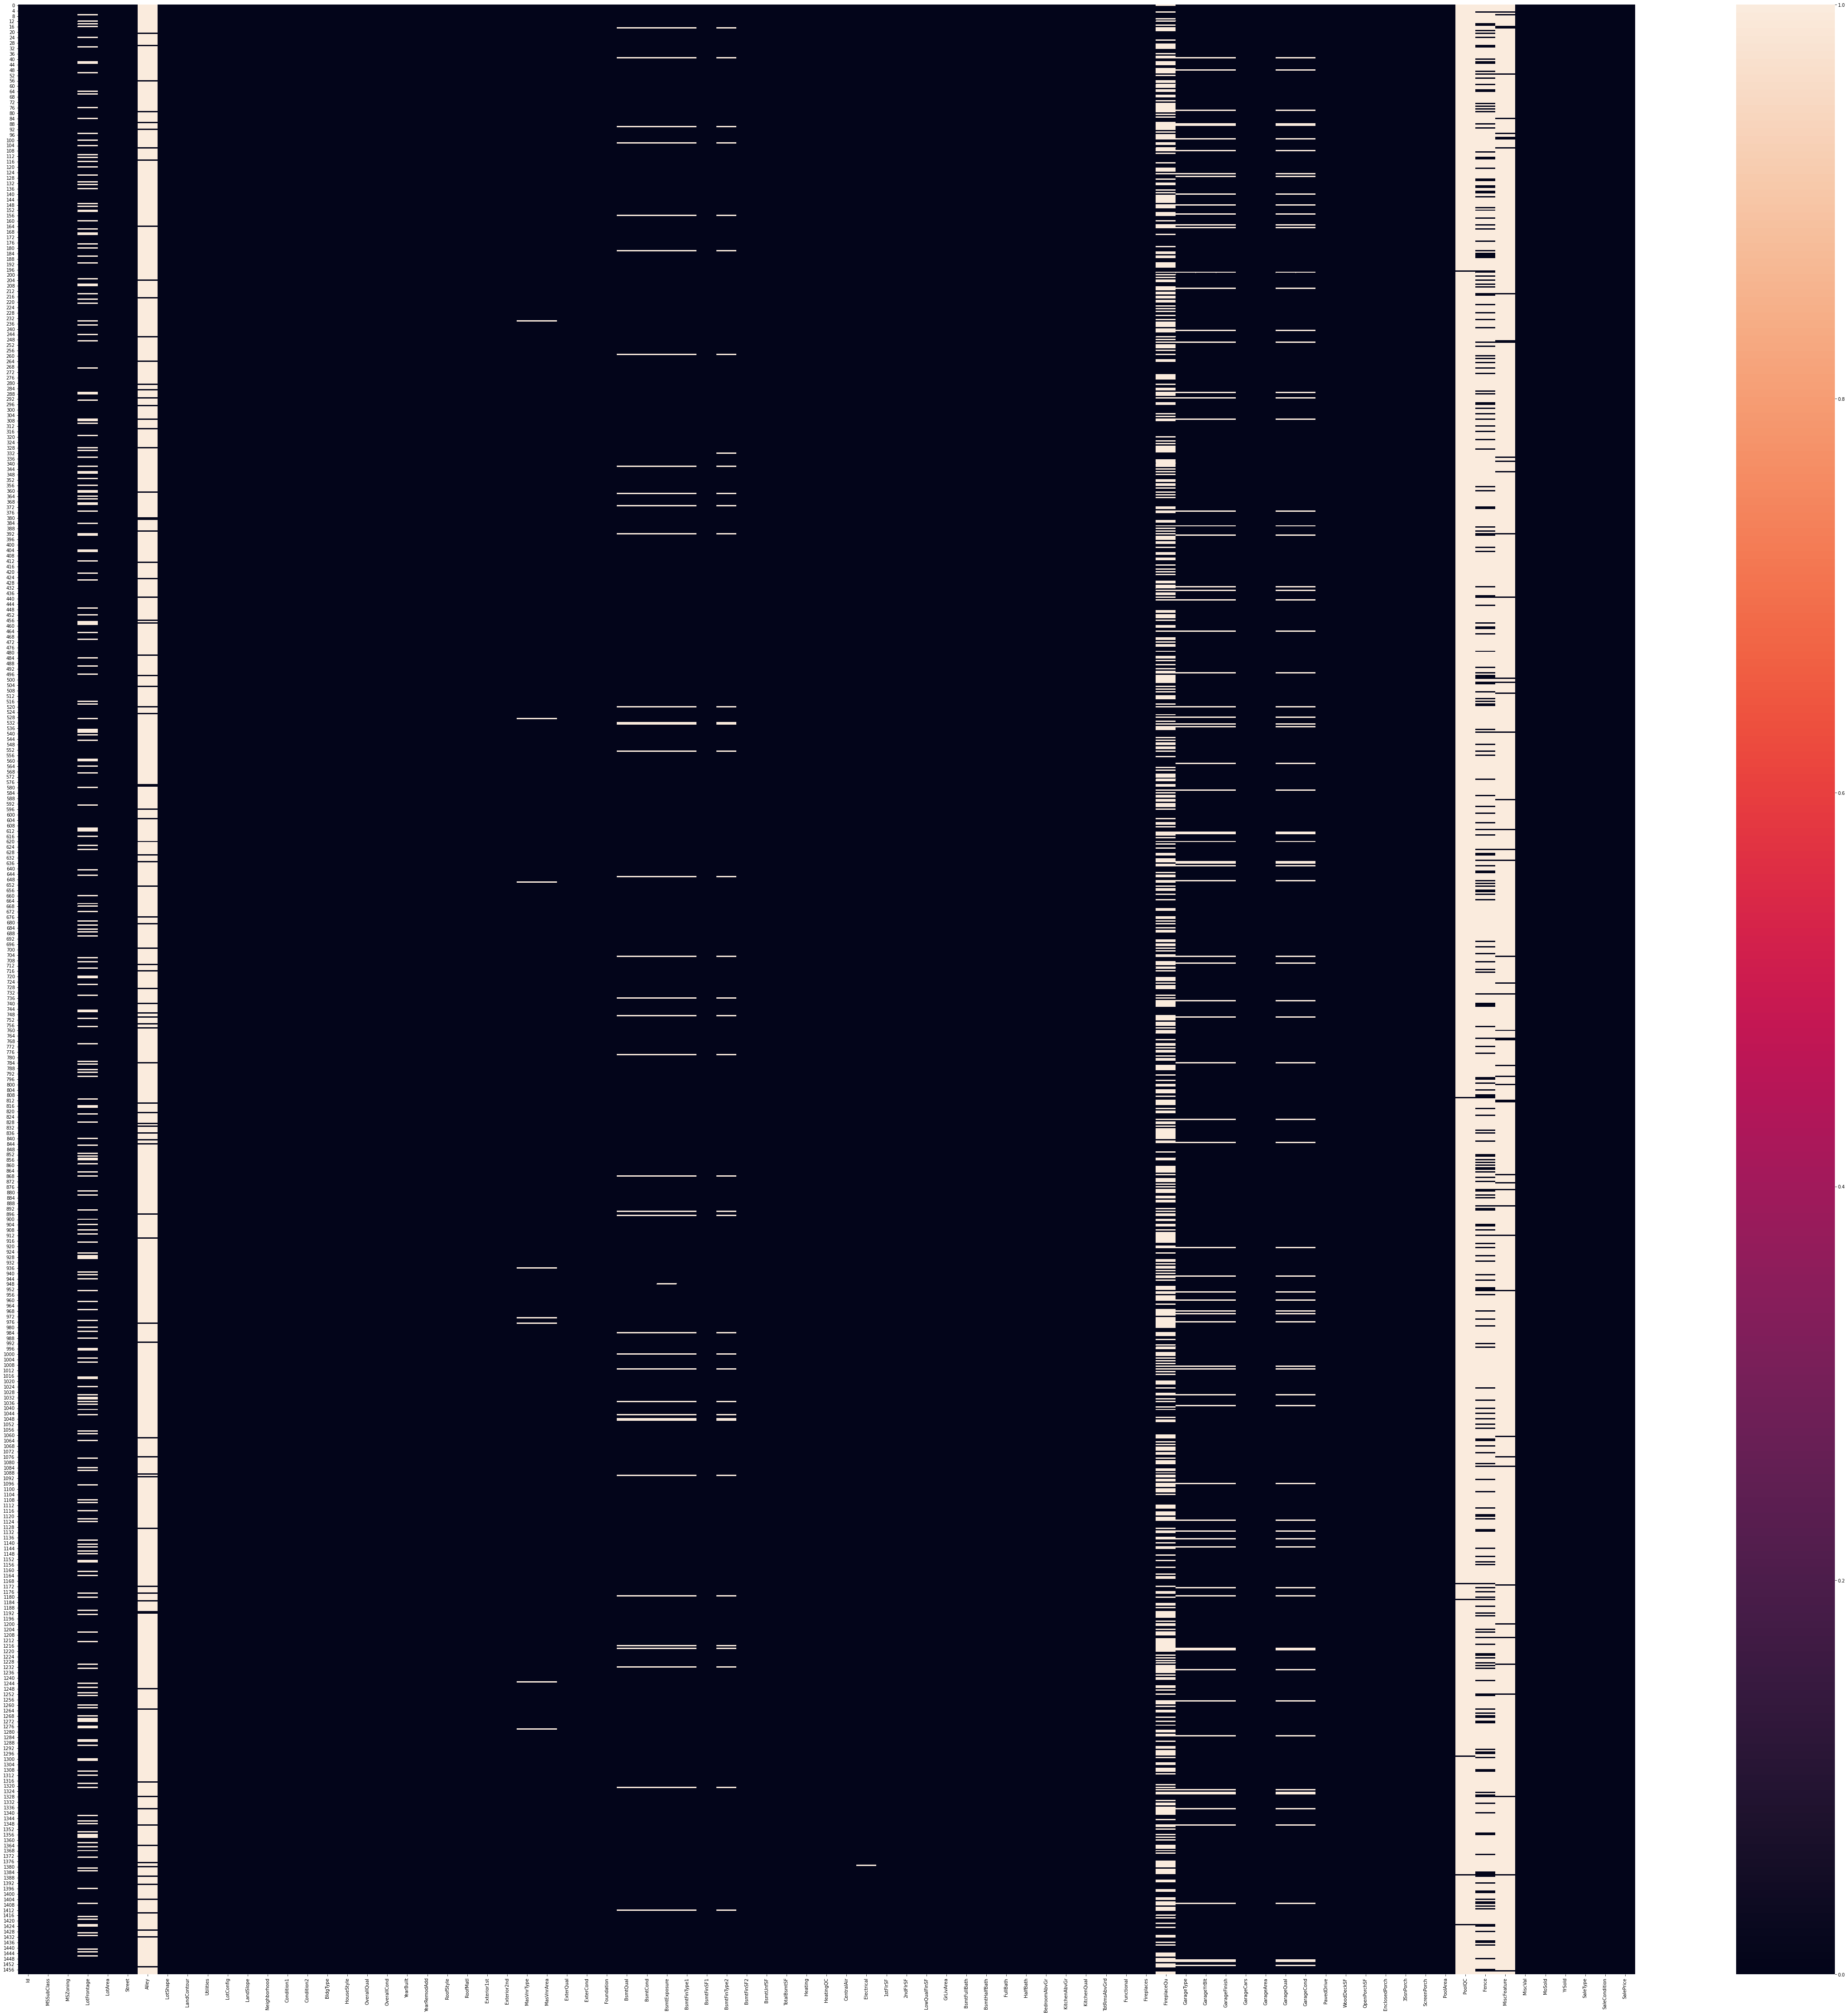

In [6]:
fig, ax = plt.subplots(figsize = (80,80))
sns.heatmap(df.isnull())
plt.show()

In [7]:
df[df.columns[df.isnull().sum()>0]].isnull().sum()/df.shape[0]*100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [10]:
df.describe(include = "object").transpose()

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [11]:
null_cols = df.columns[df.isnull().sum()>0]
null_cols

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [12]:
null_vals = [df.LotFrontage.median(),"No Alley",df.MasVnrType.mode()[0],
             df.MasVnrArea.median(),df.BsmtQual.mode()[0],
             df.BsmtCond.mode()[0],df.BsmtExposure.mode()[0],
            df.BsmtFinType1.mode()[0],df.BsmtFinType1.mode()[0],
            df.Electrical.mode()[0],"No Fireplace",df.GarageType.mode()[0],
            df.GarageYrBlt.median(), df.GarageFinish.mode()[0],
             df.GarageQual.mode()[0],df.GarageCond.mode()[0],"No Pool",
            "No Fence","No Fence","No MIscFeature"]
for i,j in zip(null_cols,null_vals):
    df[i].fillna(j, inplace = True)

In [13]:
df.isnull().sum().sum()

0

In [14]:
df.drop("Id", axis = 1, inplace =True)

In [15]:
df_num = df.select_dtypes(include = np.number)
df_cat = df.select_dtypes(include = "object")

In [16]:
df_num.shape

(1460, 37)

In [17]:
df_cat.shape

(1460, 43)

## Univariate Analysis

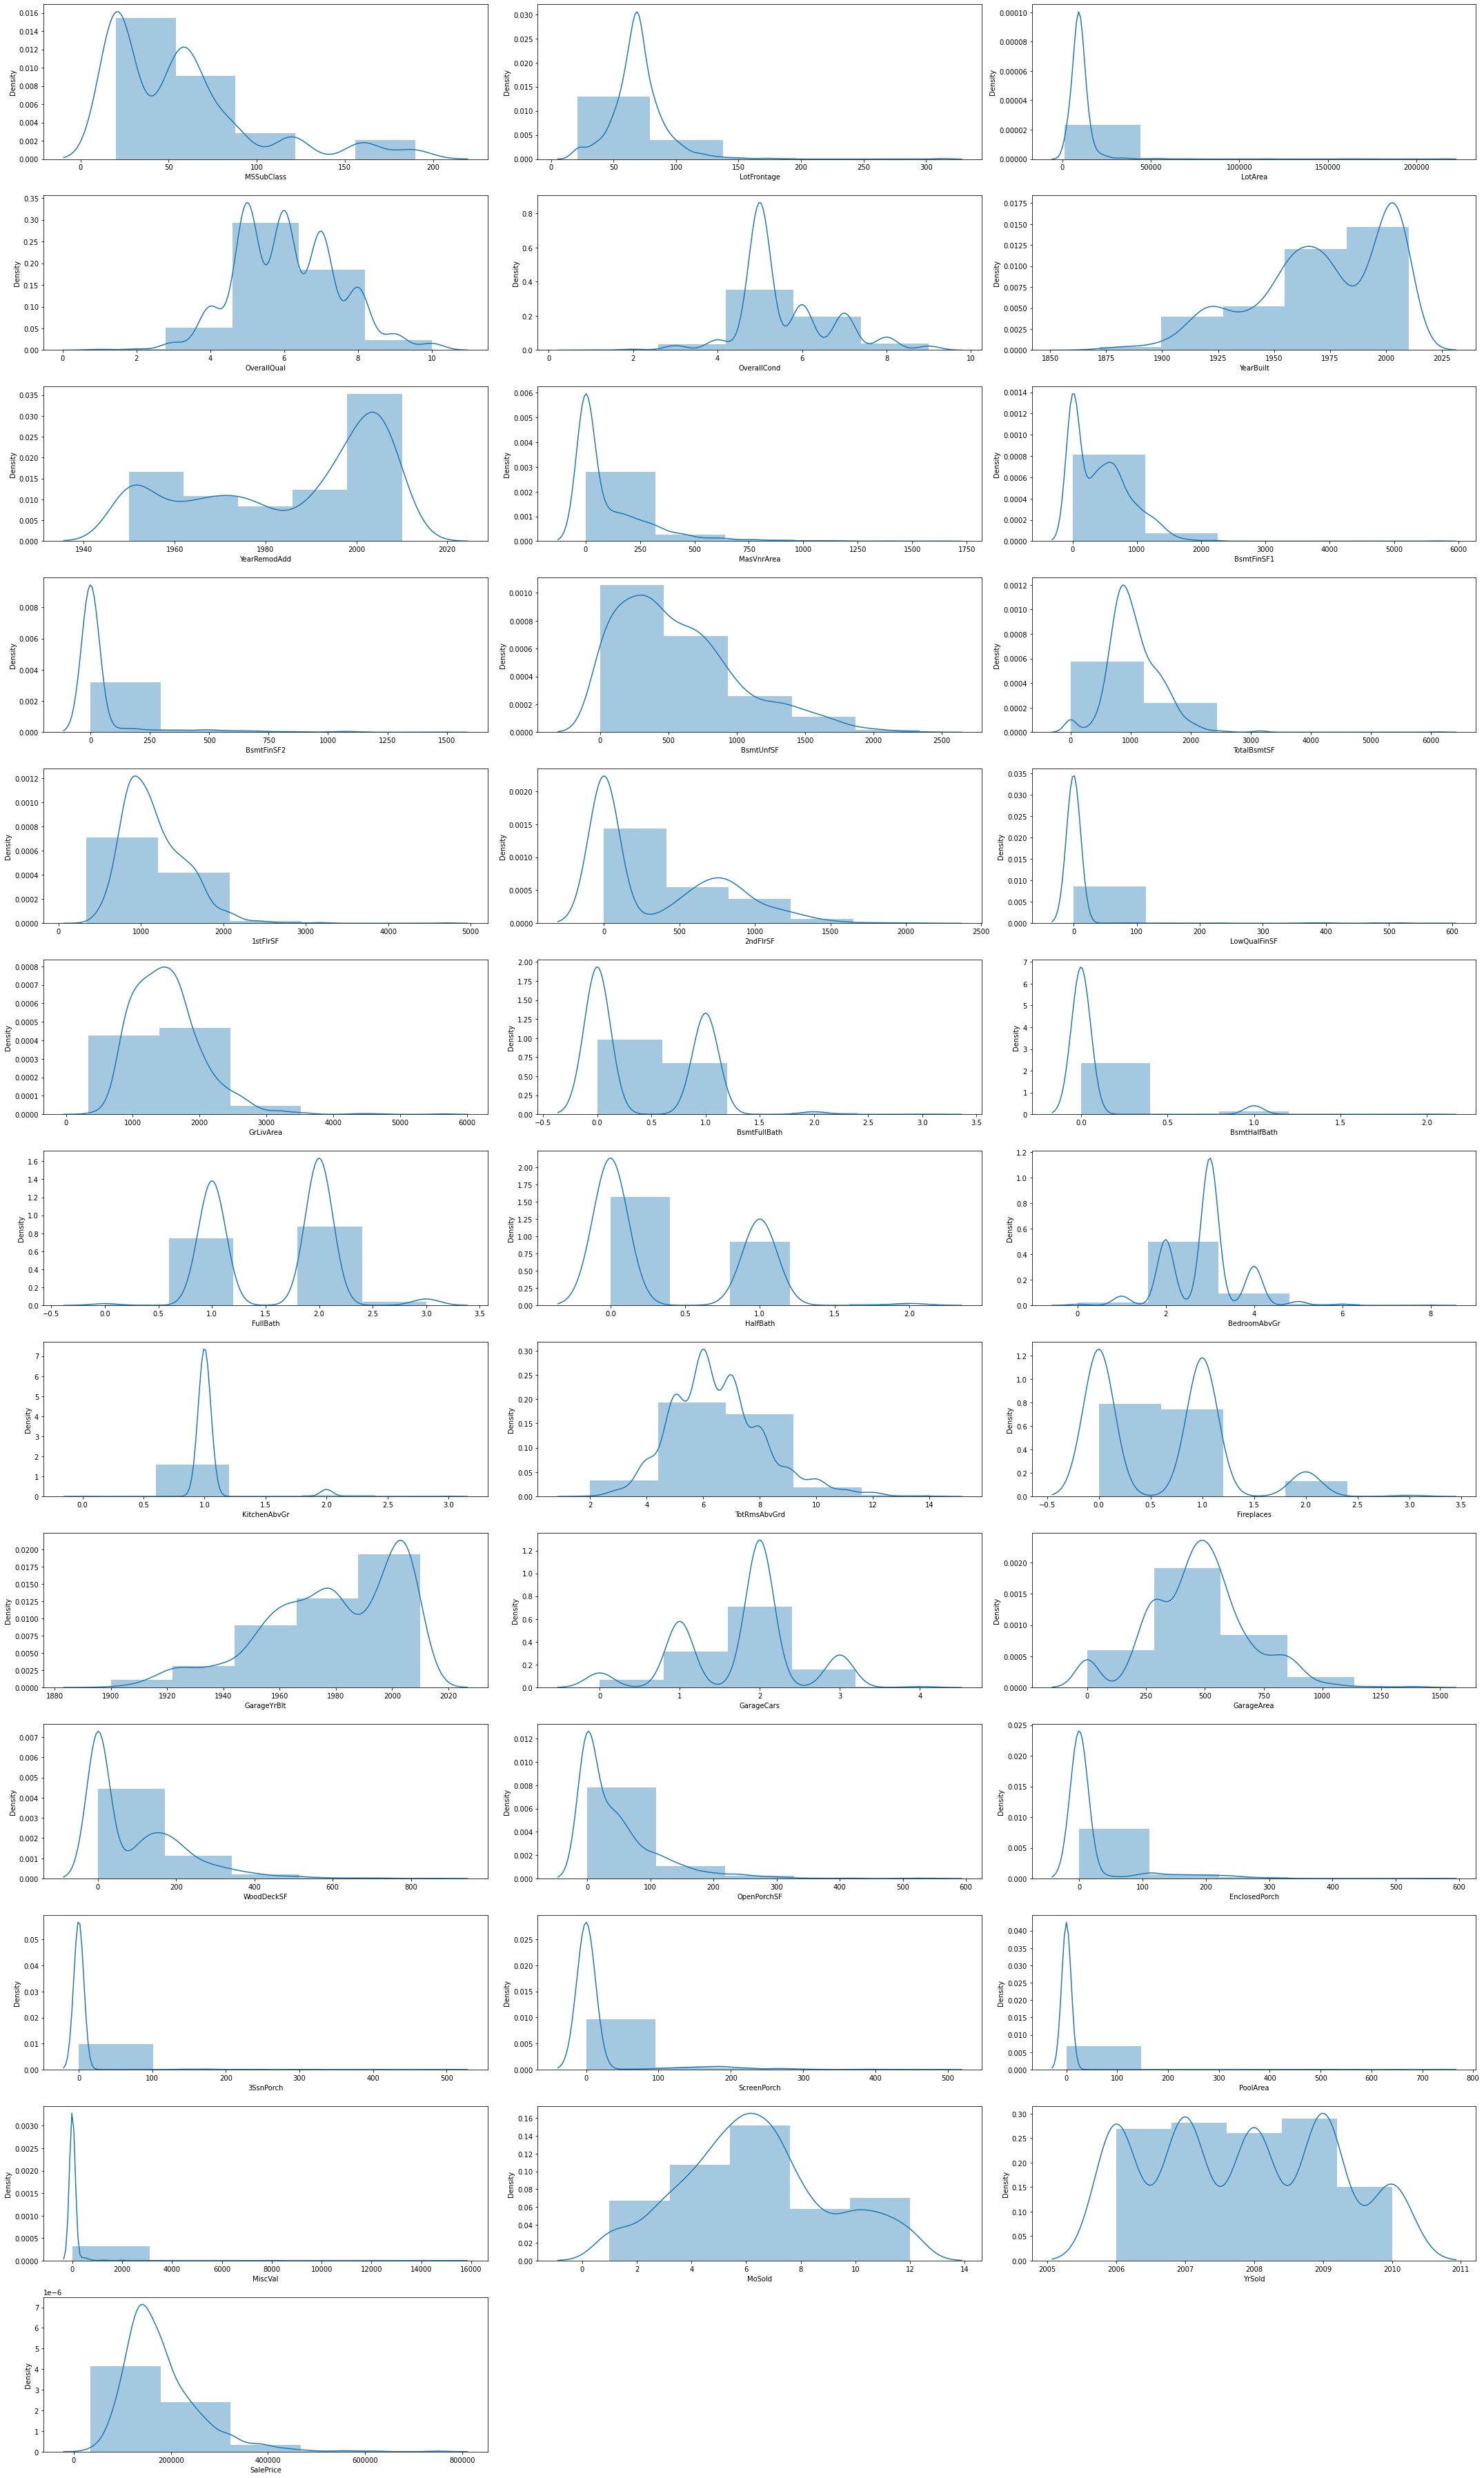

In [18]:
fig, ax = plt.subplots(nrows = 13, ncols = 3, figsize = (30,50))
for i,j in zip(df_num.columns, ax.flatten()):
    sns.distplot(df[i], bins = 5, ax = j)
for i in [37,38]:
    fig.delaxes(ax.flatten()[i])
plt.tight_layout()
plt.show()

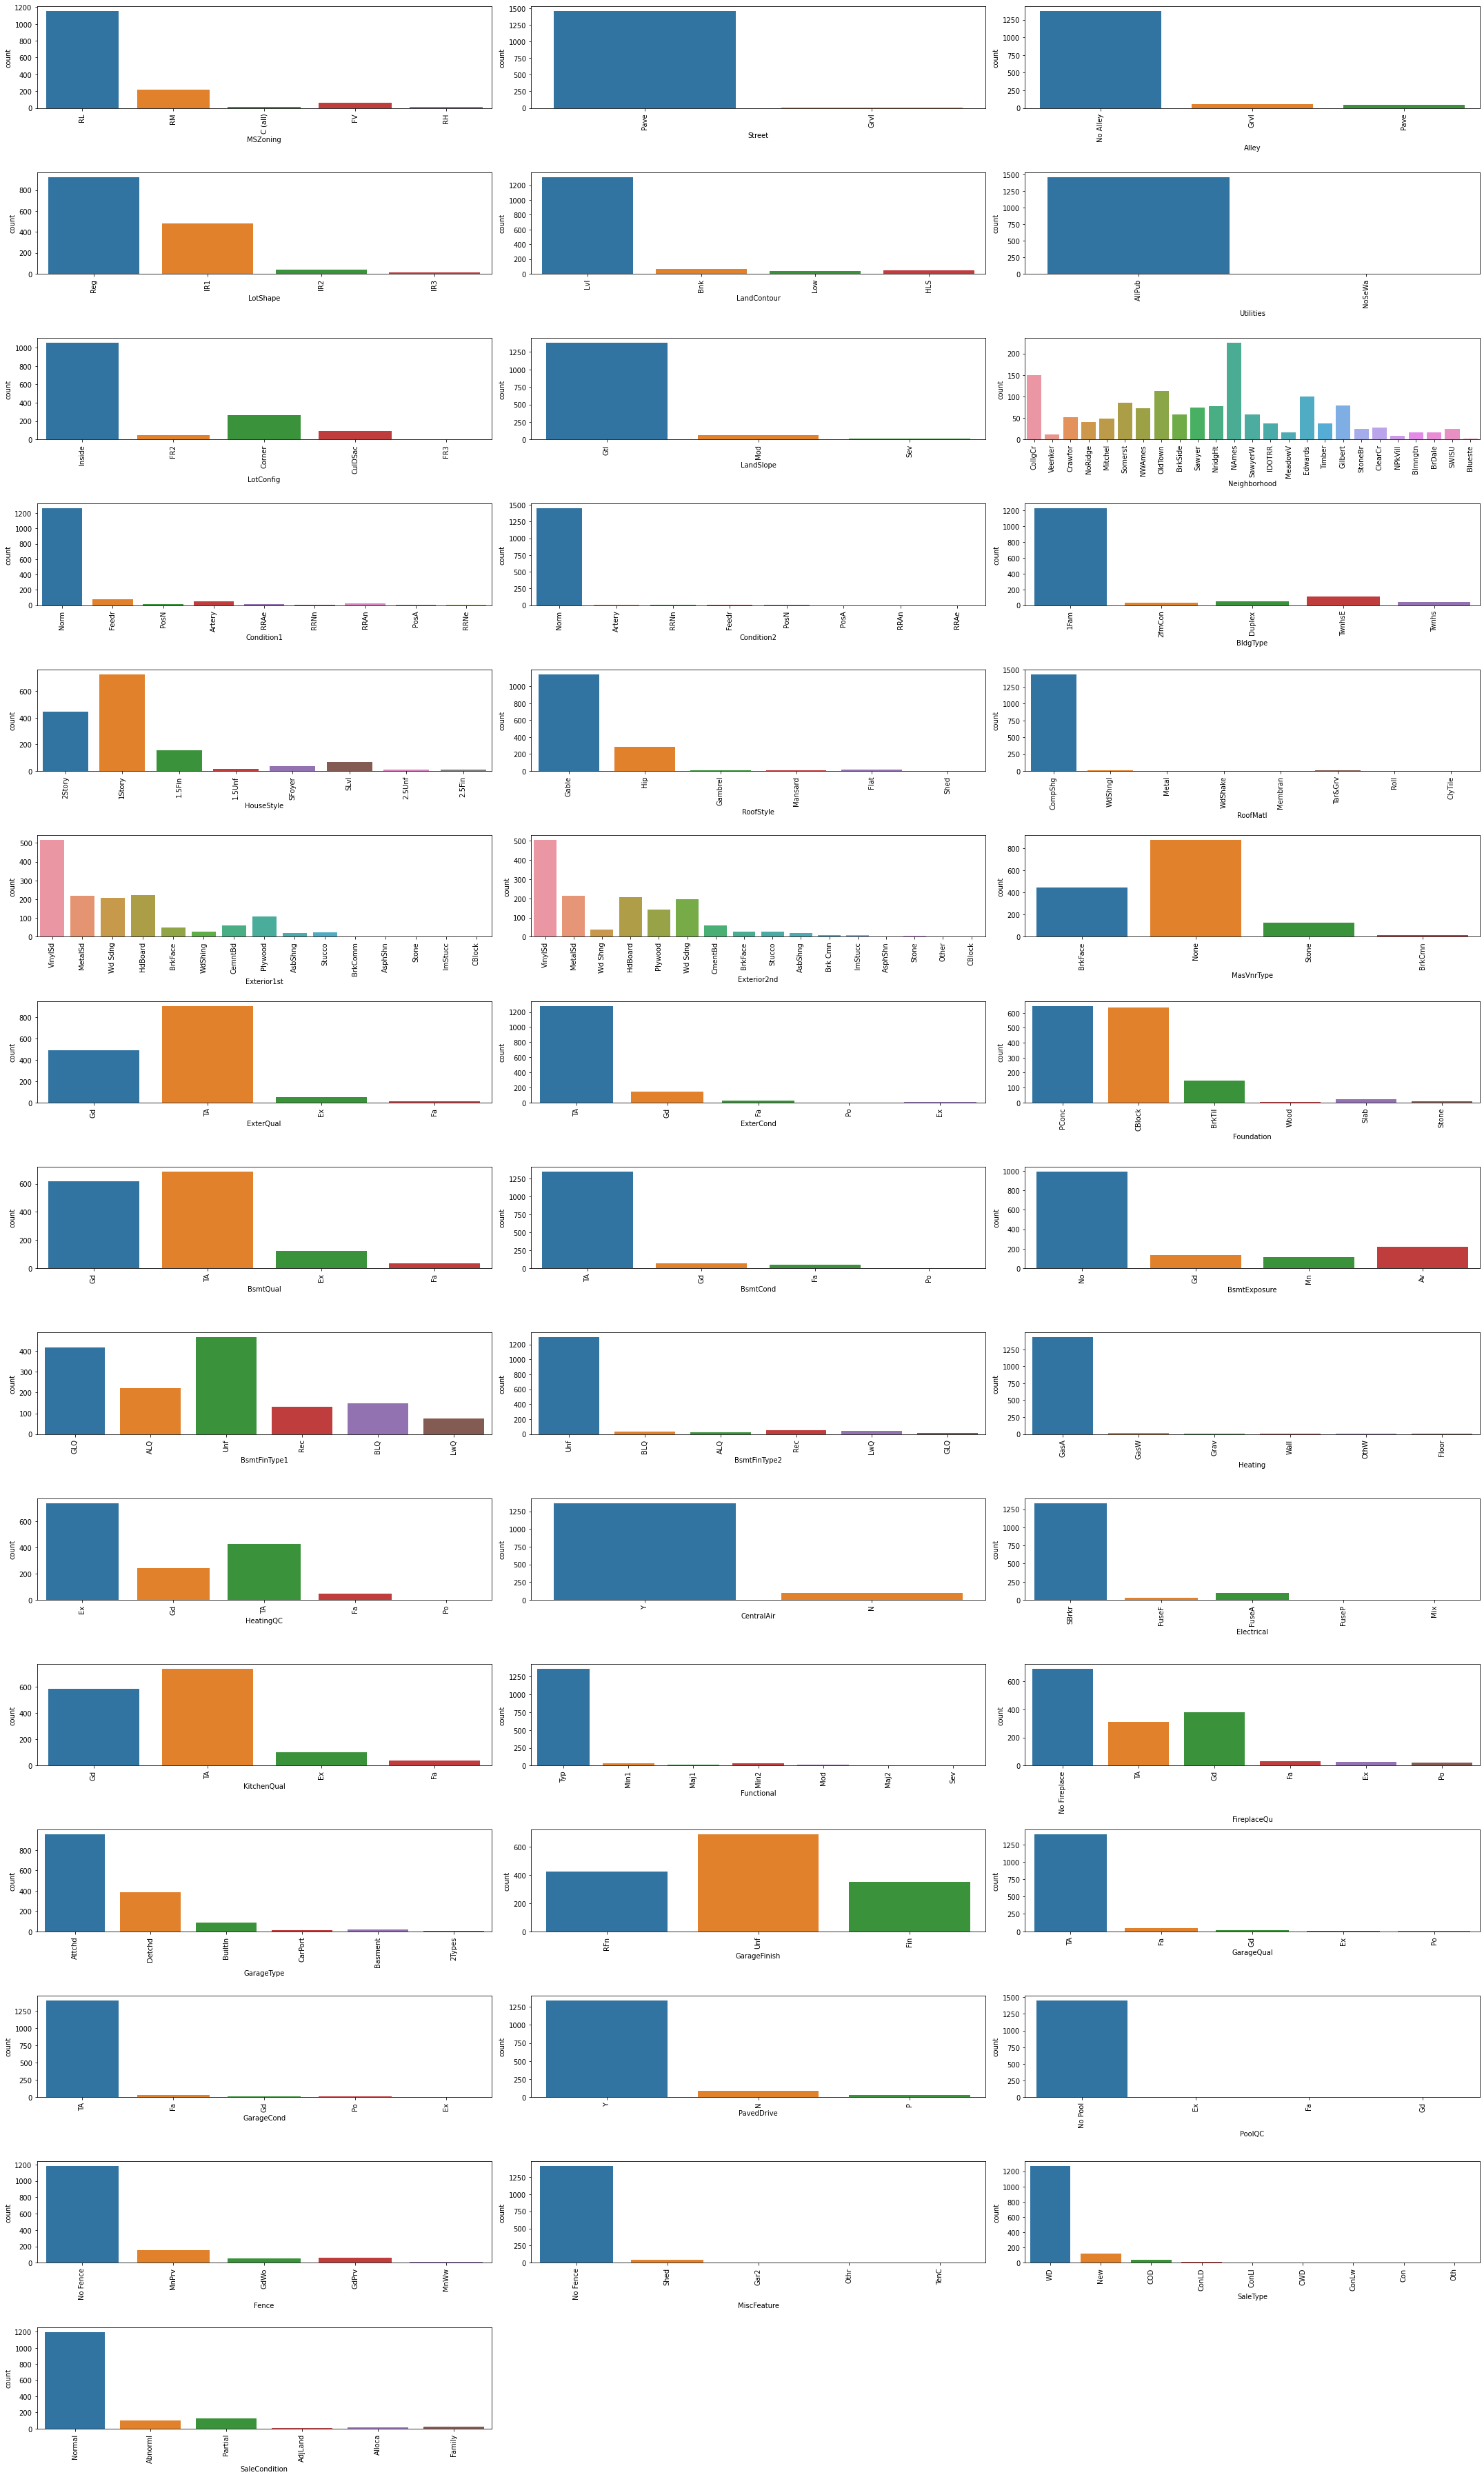

In [19]:
fig, ax = plt.subplots(nrows = 15, ncols = 3, figsize = (30,50))
for i,j in zip(df_cat.columns, ax.flatten()):
    sns.countplot(df[i], ax = j)
    j.set_xticklabels(j.get_xticklabels(),rotation = 90)
for i in [43,44]:
    fig.delaxes(ax.flatten()[i])
plt.tight_layout()
plt.show()

## Bi-variate Analysis

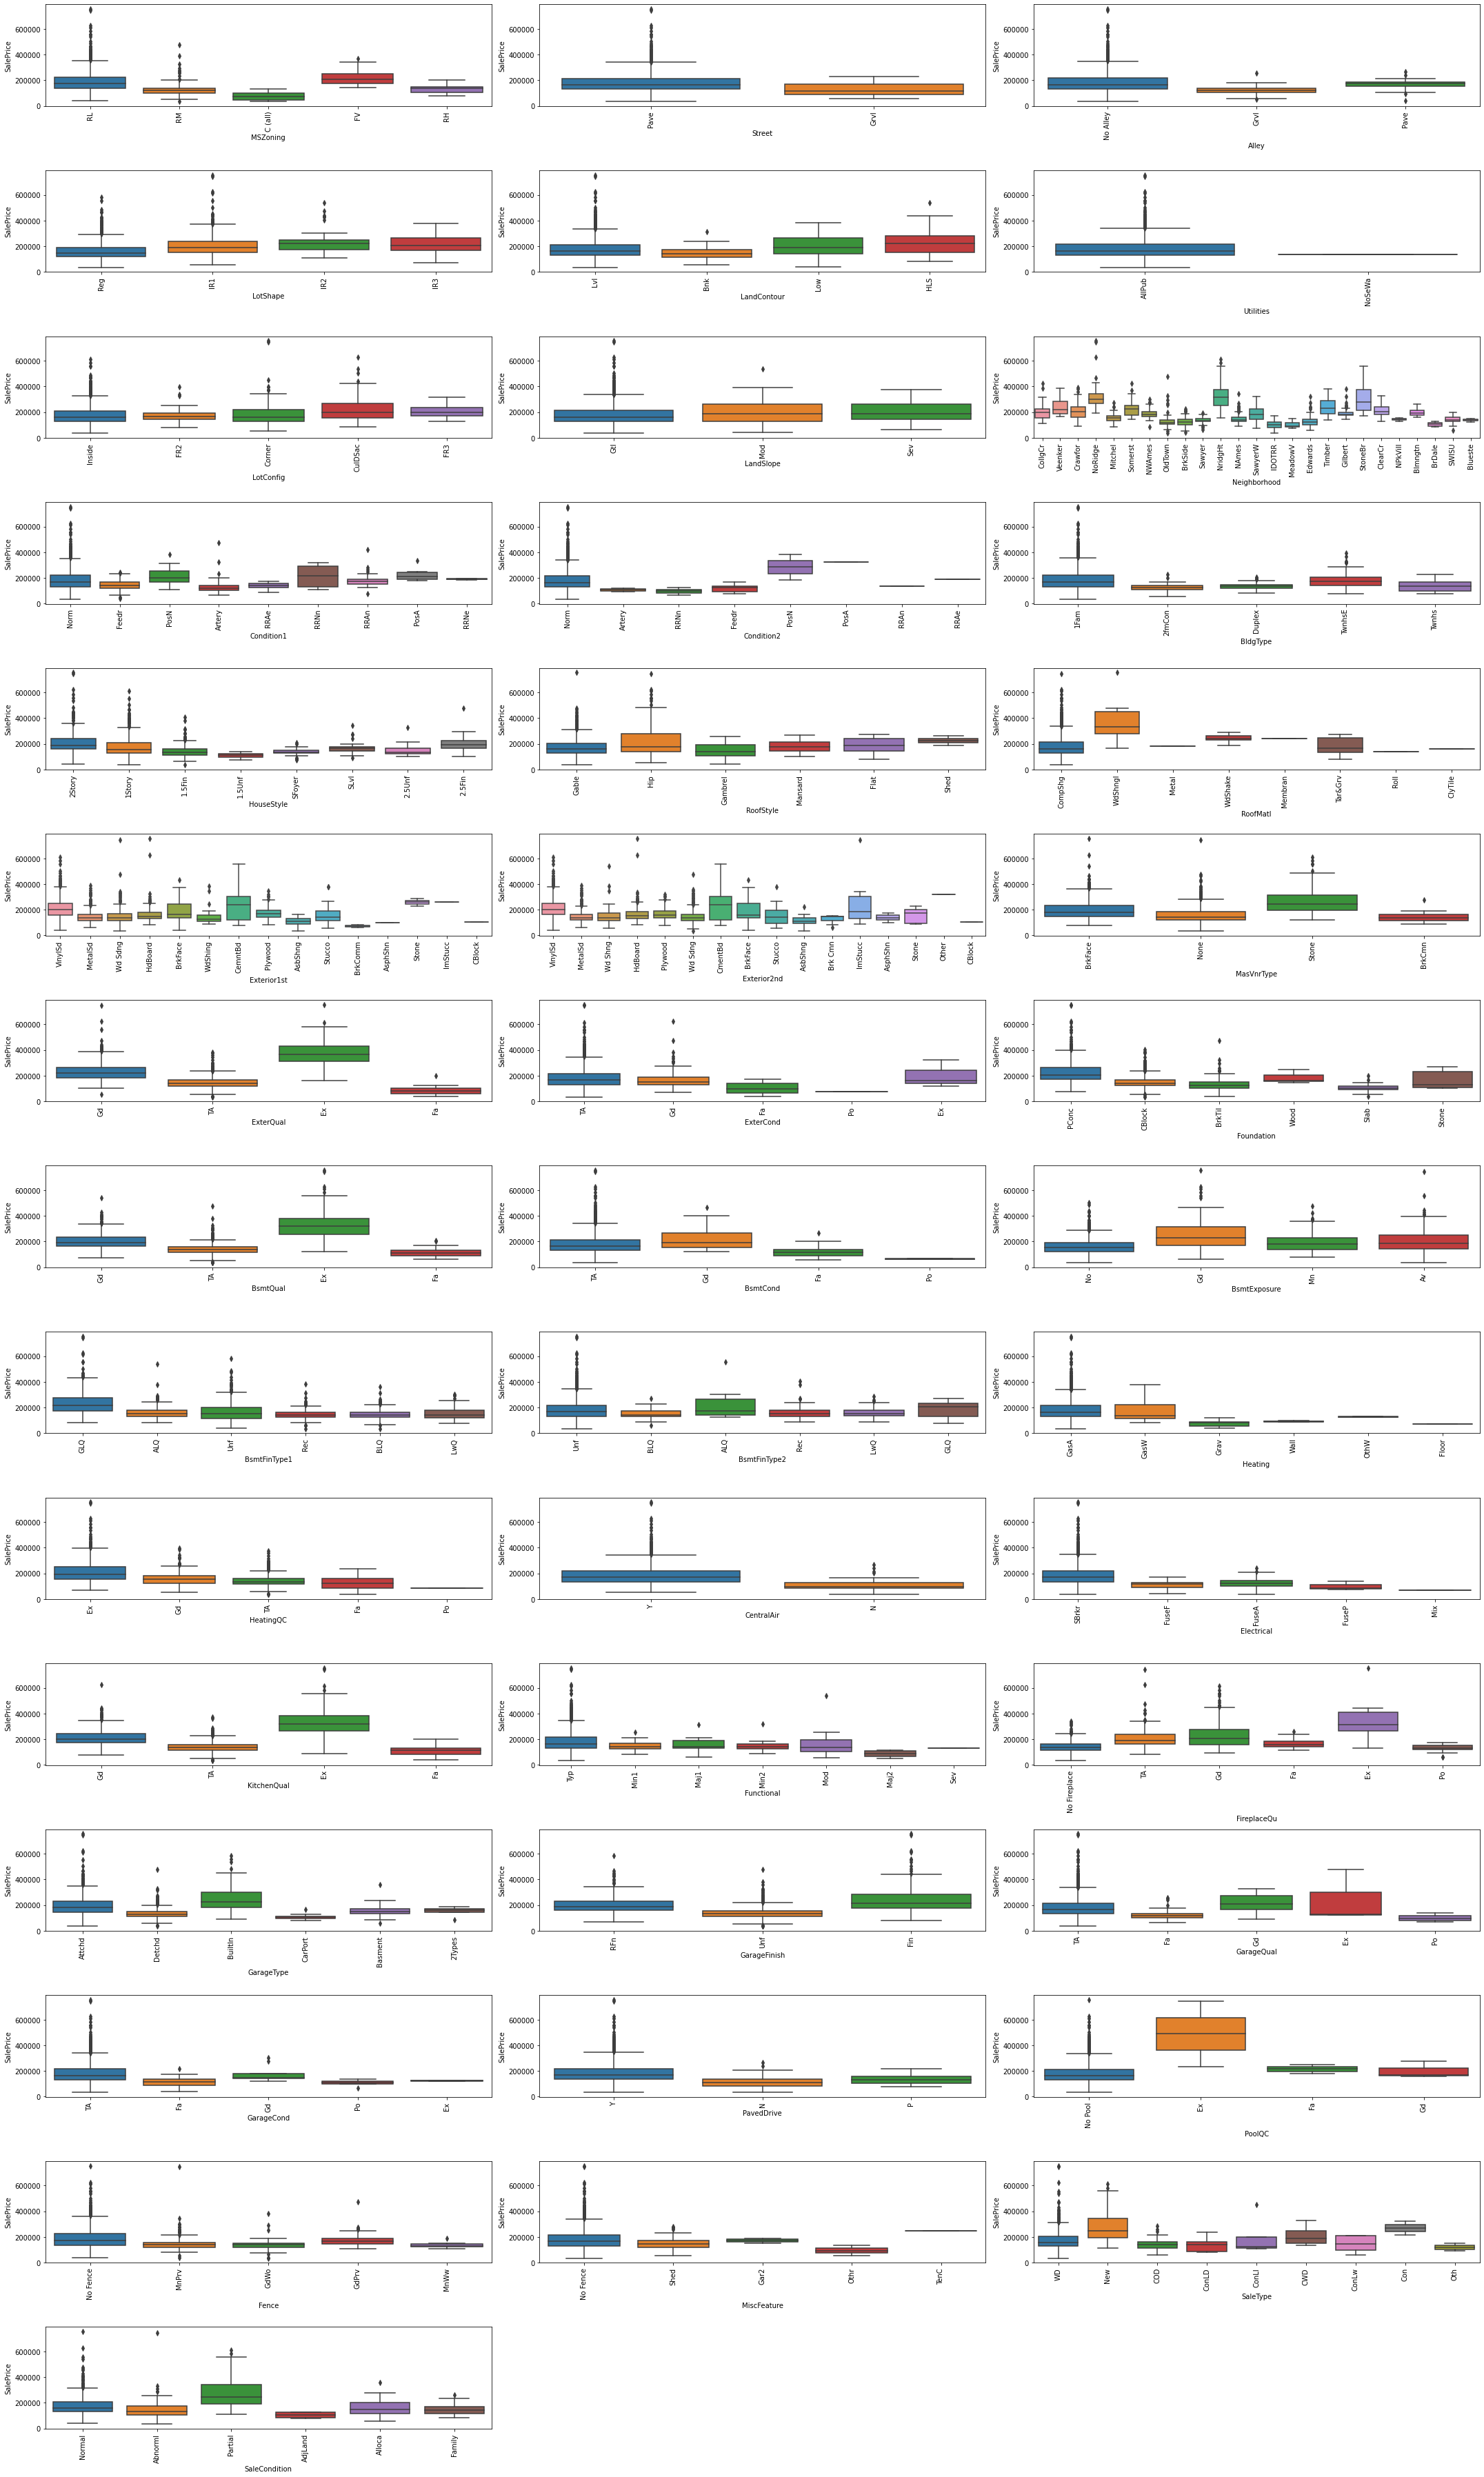

In [20]:
fig, ax = plt.subplots(nrows = 15, ncols = 3, figsize = (30,50))
for i,j in zip(df_cat.columns, ax.flatten()):
    sns.boxplot(x = df[i], y = df.SalePrice, ax = j)
    j.set_xticklabels(j.get_xticklabels(),rotation = 90)
for i in [43,44]:
    fig.delaxes(ax.flatten()[i])
plt.tight_layout()
plt.show()

## Multi-variate Analysis

In [21]:
sns.pairplot(df_num)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [22]:
fig, ax = plt.subplots(figsize =(80,80))
sns.heatmap(df.corr(), annot = True, annot_kws = {"Size": 30}, fmt =".2f", vmin = -1, vmax = 1)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Data Pre-processing

In [23]:
df_dummies = pd.get_dummies(df)

In [26]:
final = MinMaxScaler().fit_transform(df_dummies.drop("SalePrice", axis = 1))
final_df = pd.DataFrame(final, columns = df_dummies.columns.drop("SalePrice"))
final_df = pd.concat([final_df, df.SalePrice], axis = 1)
final_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_Gar2,MiscFeature_No Fence,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.000000,0.064212,0.140098,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.936364,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.50,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,208500
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.000000,0.121575,0.206547,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.690909,0.50,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.25,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,181500
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.000000,0.185788,0.150573,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.918182,0.50,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.50,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,223500
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,0.000000,0.231164,0.123732,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.890909,0.75,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.00,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,140000
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.000000,0.209760,0.187398,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.909091,0.75,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.50,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.140411,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,0.407962,0.155974,0.142038,0.336077,0.0,0.247362,0.000000,0.0,0.666667,0.5,0.375,0.333333,0.416667,0.333333,0.900000,0.50,0.324401,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.636364,0.25,0.0,0.0,0.0,1.0,...,0.0,1

In [27]:
x = final_df.drop("SalePrice", axis = 1)
y = final_df.SalePrice
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =0.2, random_state = 10)

## ML Model Building and Evaluation

In [79]:
model_list = [LinearRegression(), SGDRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), BaggingRegressor(), AdaBoostRegressor(), XGBRegressor(), SVR(), KNeighborsRegressor()]
eval = {"Model Name": [], "RMSE Score": [], "MAE Score": [], "R-Squared": []}
eval_df = pd.DataFrame(eval)
for i in model_list:
    model = i.fit(x_train, y_train)
    y_pred = i.predict(x_test)
    y_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    y_r2 = r2_score(y_test, y_pred)
    y_mae = mean_absolute_error(y_test, y_pred)
    pred_df = pd.DataFrame({"Model Name": [str(i)], "RMSE Score": [y_rmse], "MAE Score": [y_mae], "R-Squared": [y_r2]})
    eval_df = eval_df.append(pred_df)
eval_df

[20:35:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Model Name,RMSE Score,MAE Score,R-Squared
0,LinearRegression(),1196847036494236.50,92545435105828.36,-223924968571964325888.00
0,SGDRegressor(),27042.84,18397.70,0.89
0,DecisionTreeRegressor(),38190.26,25658.17,0.77
0,RandomForestRegressor(),28303.29,18819.60,0.87
0,BaggingRegressor(),29895.66,19231.85,0.86
0,AdaBoostRegressor(),34471.90,25015.66,0.81
0,XGBRegressor(),27675.44,17092.93,0.88
0,SVR(),81464.40,57347.25,-0.04
0,KNeighborsRegressor(),37346.86,26082.32,0.78


In [80]:
pd.options.display.float_format = '{:.2f}'.format

In [81]:
eval_df = eval_df.reset_index(drop= True)
eval_df

,Model Name,RMSE Score,MAE Score,R-Squared
0,LinearRegression(),1196847036494236.50,92545435105828.36,-223924968571964325888.00
1,SGDRegressor(),27042.84,18397.70,0.89
2,DecisionTreeRegressor(),38190.26,25658.17,0.77
3,RandomForestRegressor(),28303.29,18819.60,0.87
4,BaggingRegressor(),29895.66,19231.85,0.86
5,AdaBoostRegressor(),34471.90,25015.66,0.81
6,XGBRegressor(),27675.44,17092.93,0.88
7,SVR(),81464.40,57347.25,-0.04
8,KNeighborsRegressor(),37346.86,26082.32,0.78


## ANN Model

In [82]:
model = Sequential()
model.add(Dense(units = 256, activation= "relu", input_shape = (293,), kernel_initializer = "uniform"))
model.add(Dense(units = 256, activation= "relu", kernel_initializer = "uniform"))
model.add(Dense(units = 128, activation= "relu", kernel_initializer = "uniform"))
model.add(Dense(units = 128, activation= "relu", kernel_initializer = "uniform"))
model.add(Dense(units = 1, activation= "relu", input_shape = (8,), kernel_initializer = "uniform"))

In [85]:
model.compile(loss = "mean_absolute_error", metrics= ["MeanAbsoluteError"], optimizer = Adam(lr = 0.01))

In [86]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 256)               75264     
_________________________________________________________________
dense_31 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_32 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_33 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 129       
Total params: 190,593
Trainable params: 190,593
Non-trainable params: 0
_________________________________________________________________


In [87]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size =512, epochs = 500)

Train on 1168 samples, validate on 292 samples
Epoch 1/500
1168/1168 [==============================] - 0s 141us/sample - loss: 181415.6622 - MeanAbsoluteError: 181415.6562 - val_loss: 178936.1094 - val_MeanAbsoluteError: 178936.1094
Epoch 2/500
1168/1168 [==============================] - 0s 48us/sample - loss: 181384.1494 - MeanAbsoluteError: 181384.1562 - val_loss: 178628.7188 - val_MeanAbsoluteError: 178628.7188
Epoch 3/500
1168/1168 [==============================] - 0s 46us/sample - loss: 180749.0640 - MeanAbsoluteError: 180749.0625 - val_loss: 175778.7656 - val_MeanAbsoluteError: 175778.7656
Epoch 4/500
1168/1168 [==============================] - 0s 51us/sample - loss: 176189.8350 - MeanAbsoluteError: 176189.8281 - val_loss: 161790.8906 - val_MeanAbsoluteError: 161790.8906
Epoch 5/500
1168/1168 [==============================] - 0s 50us/sample - loss: 156295.6723 - MeanAbsoluteError: 156295.6719 - val_loss: 113081.4141 - val_MeanAbsoluteError: 113081.4141
Epoch 6/500
1168/1168 

## Evaluation Table

In [88]:
y_pred = model.predict(x_test)
y_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
y_r2 = r2_score(y_test, y_pred)
y_mae = mean_absolute_error(y_test, y_pred)
pred_df = pd.DataFrame({"Model Name": ["ANN()"], "RMSE Score": [y_rmse], "MAE Score": [y_mae], "R-Squared": [y_r2]})
eval_df = eval_df.append(pred_df)
eval_df

,Model Name,RMSE Score,MAE Score,R-Squared
0,LinearRegression(),1196847036494236.50,92545435105828.36,-223924968571964325888.00
1,SGDRegressor(),27042.84,18397.70,0.89
2,DecisionTreeRegressor(),38190.26,25658.17,0.77
3,RandomForestRegressor(),28303.29,18819.60,0.87
4,BaggingRegressor(),29895.66,19231.85,0.86
5,AdaBoostRegressor(),34471.90,25015.66,0.81
6,XGBRegressor(),27675.44,17092.93,0.88
7,SVR(),81464.40,57347.25,-0.04
8,KNeighborsRegressor(),37346.86,26082.32,0.78
0,ANN(),24324.60,16232.69,0.91
